Profiling display

In [3]:
# library imports
from matplotlib import pyplot as plt
import numpy as np

# import PGL Eyelink interface
from pgl import pglEyelink

# Load PGL libraries and start a PGL window
from pgl import pgl as pglLibrary
pgl = pglLibrary()

# close any existing windows
pgl.cleanUp()

# open a new window
pgl.open(0,800,600)
pgl.visualAngle(57, 60,40)

================================ pglBase: init =================================
(pgl:checkOS) Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:35:20) [Clang 16.0.6 ]
(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 26.2
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 4 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display) GammaTable size: 1024
(pglBase) Main library instance created
(pglBase:shutdownAll) Shutting down mglMetal process: 50827
(pglBase:removeOrphanedSockets) Removing orphaned socket: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20260131_102713.An8BxTBdPM
(pglBase:removeOrphanedSockets) Removed 1 orphaned sockets
================================= pglBase:open =================================
(pglBase:open) Starting mglMetal application: /Users/justin/Libra

Run profile on a full screen grating

(pglProfile) Cleared all profile data.
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pglProfile) profileModeBufferSize set to 7200 frames (60.00 seconds)(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits

(pglProfile) Will reallocate if this is exceeded, but you can change this with pgl.profileModeBufferSize = <new size>
(pglProfile) profileMode set to 2
(pglProfile) profileMode is off, saving profile data.
(pglProfile) profileMode set to 0
-------- pglProfile 1 -------------
235 frames, 1.971 secs Screen: 1 (800x600)
Started: 2026-01-31 10:26:24 Ended: 10:26:26
Frame Rate: 120 Hz Expected Frame Time: 8.33 ms
Median frame time: 8.33 ms, 8.39 ± 0.86 mean ± std ms
Dropped frames (longer than 12.58 ms): 1 (0.43%)
  Dropped Frame 5: 21.03 ms
     ack: 295833470.414 ms 
     commandCode: 1001
     success: 1
     processedTime: 295833470.414 ms 
     vertexStart: 295833438.414 ms
     vertexEnd: 295833438.414 ms
     fragmentStart: 295833438.414 ms
    

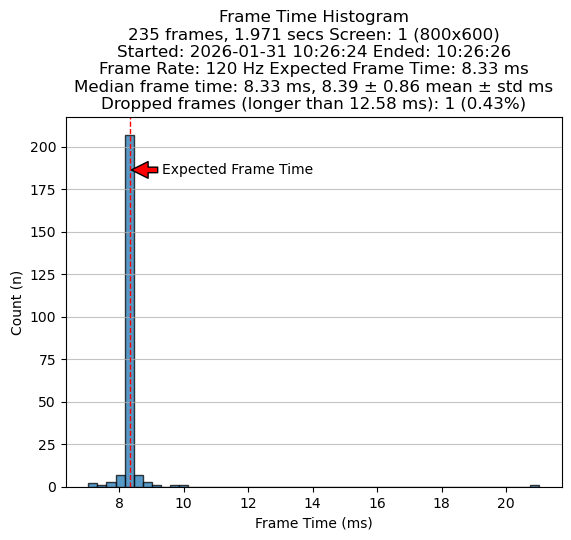

In [2]:

# clear the profiling mode
pgl.profileModeClearAll()

# initialize the grating
grating = pgl.grating(spatialFrequency=0.1,phase=0, contrast=1,temporalFrequency=4.0,direction=-1)

# display duration in second
duration = 2
startTime = pgl.getSecs()

# clear the screen to gray
pgl.clearScreen((0.5, 0.5, 0.5))
pgl.flush()

# set to keep all profiling data
pgl.profileMode = 2

#pgl.batchStart()

# display the grating stimulus
while pgl.getSecs() - startTime < duration:
    grating.display()
    pgl.flush()
pgl.profileMode = 0

#pgl.flush()
#pgl.waitSecs(1)
#pgl.batchRun()
#pgl.waitSecs(2)
#pgl.batchEnd()
#pgl.waitSecs(2)

pgl.profileModeDisplay()

Dots

(pglProfile) Cleared all profile data.
120
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pglProfile) profileMode set to 2
(pglProfile) profileMode is off, saving profile data.
(pglProfile) profileMode set to 0
-------- pglProfile 1 -------------
120 frames, 1.000 secs Screen: 1 (800x600)
Started: 2026-01-31 10:28:11 Ended: 10:28:12
Frame Rate: 120 Hz Expected Frame Time: 8.33 ms
Median frame time: 8.33 ms, 8.33 ± 0.24 mean ± std ms
Dropped frames (longer than 12.50 ms): 0 (0.00%)


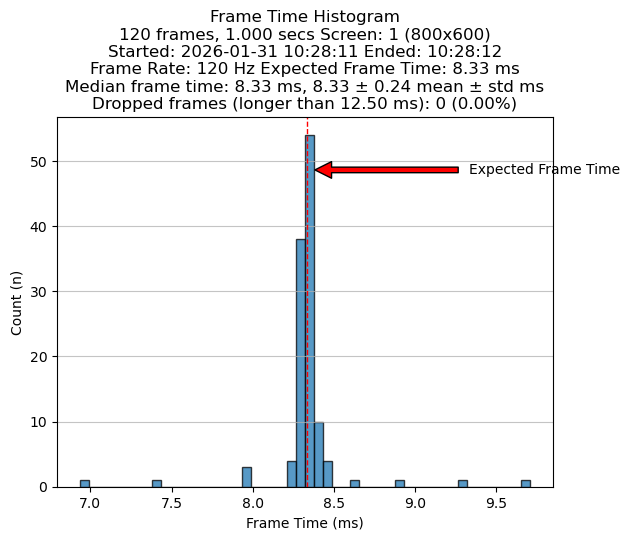

In [6]:
pgl.profileModeClearAll()
#pgl.fullScreen(True)
_,_,frameRate,_ =pgl.getResolution()
print(frameRate)
pgl.profileMode = 2
#print(pgl.profileMode)
#print(pgl.profileModeBufferSize )
pgl.clearScreen([0,0,0])
pgl.flush()
for i in range(frameRate*1):
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    pgl.flush()
pgl.profileMode = 0
#pgl.fullScreen(False)
pgl.profileModeDisplay()


In [7]:
_,_,frameRate,_ =pgl.getResolution()
pgl.profileModeClearAll()
pgl.batchStart()
for i in range(frameRate*5):
    #im.display()
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    #pgl.printCommandResults()


    pgl.flush()
    #pgl.printCommandResults()
#pgl.batchRun()
#pgl.batchEnd()

(pglProfile) Cleared all profile data.
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pglBatch:batchStart) Batch started.


(pglBatch:batchRun) Batch run initiated.
(pglBatch:batchEnd) Ended batch with 1200 commands.
-------- pglProfile 1 -------------
600 frames, 5.001 secs Screen: 1 (800x600)
Started: 2026-01-31 10:28:36 Ended: 10:28:56
Frame Rate: 120 Hz Expected Frame Time: 8.33 ms
Median frame time: 8.34 ms, 8.33 ± 0.37 mean ± std ms
Dropped frames (longer than 12.50 ms): 0 (0.00%)


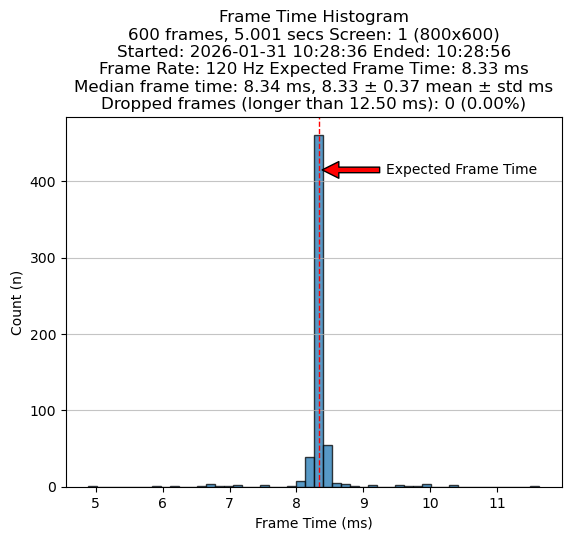

In [8]:
pgl.batchRun()
pgl.batchEnd()
pgl.profileModeDisplay()